# Titanic Survivor's Classification - Kaggle Competition¶

Problem Statement: To predict if a passenger survived the sinking of the Titanic or not.
#Competition Link: https://www.kaggle.com/c/titanic

#Solution by: Mohd Imran.
#GitHub Profile: https://github.com/khancuh

In [1]:
#Some important Libraray import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplo

# Load the Data set

In [2]:
#Two csv file Train.csv and Test.csv
train = pd.read_csv("C:\\Users\\Imran\\Desktop\\train.csv")
test = pd.read_csv("C:\\Users\\Imran\\Desktop\\test.csv")

# Exploring the Data Analysis

    1)Finding statistical information for numeric feature(s)
    2)Observing the distribution of data for numeric & categorical feature(s)
    3)Finding # of features having NaN/missing values


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Dictionary:

    1)Survived: Did the passenger survive, 0 = No, 1 = Yes. (Dependent Variable)
    2)Pclass: Ticket class - 1 = Upper Class, 2 = Middle Class, 3 = Lower Class
    3)SibSp: # of siblings / spouses aboard the Titanic.
    4)Parch: # of parents / children aboard the Titanic.
    5)Ticket: Ticket number.
    6)Cabin: Cabin number.
    7)Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton.

In [5]:
train.shape

(891, 12)

In [6]:
train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
test.shape

(418, 11)

In [8]:
test.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#Merging Both train and test dataset
train['test_data']=0
test['test_data'] = 1
test['Survived'] = np.NaN
df = pd.concat(objs=[train,test],sort=False)

In [10]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'test_data'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
test_data      1309 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
test_data         0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
test_data,1309.0,0.319328,0.466394,0.00,0.0000,0.0000,1.000,1.0000


C:\Users\Imran\Anaconda3\anacond\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Imran\Anaconda3\anacond\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


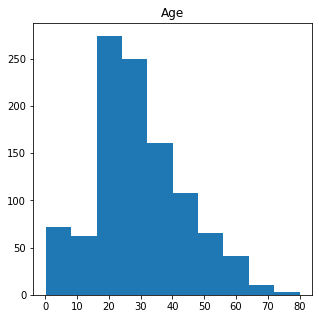

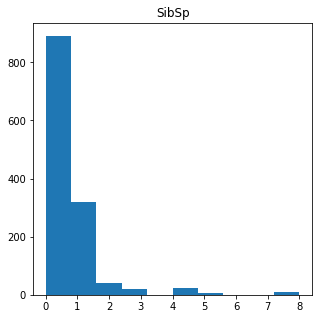

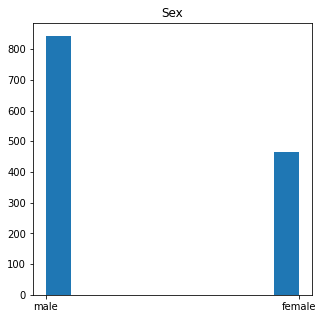

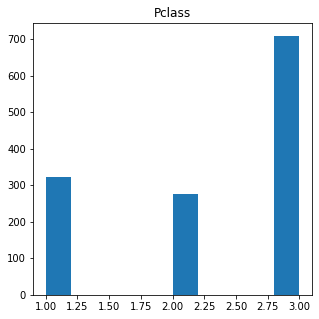

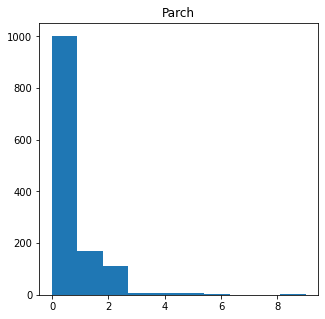

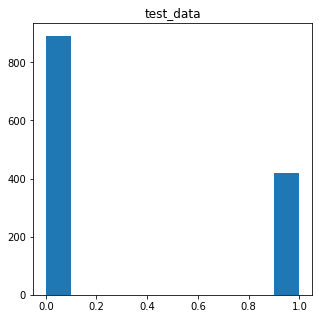

In [14]:
#Plotting histogram for numeric features to understand distribution
numeric_columns = ['Age', 'SibSp','Sex','Pclass','Parch', 'test_data']
for column in numeric_columns:
    plt.figure(figsize=(5,5))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

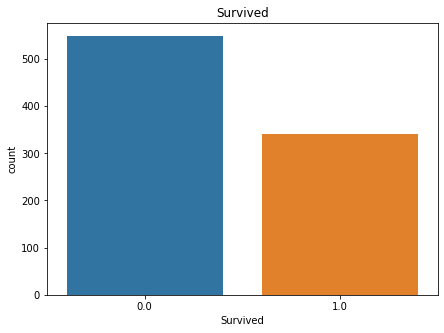

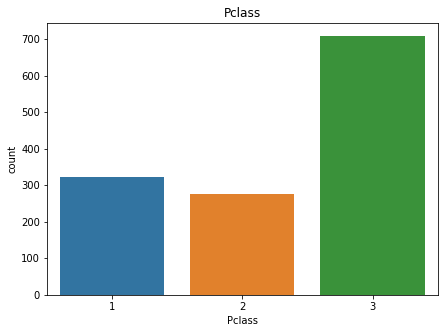

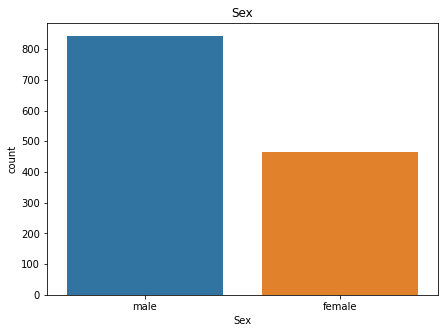

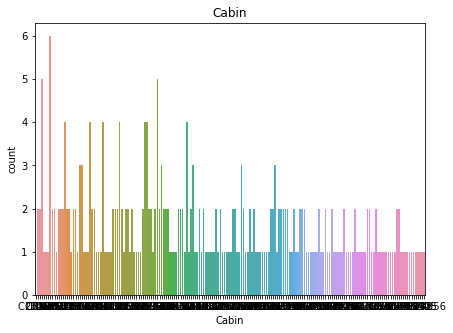

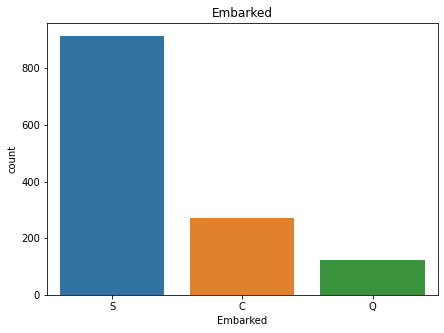

In [15]:
# Plotting countplots for categorical features
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']
for column in categorical_columns:
  plt.figure(figsize=(7,5))
  sns.countplot(x=df[column])
  plt.title(column)
  plt.show()

In [16]:
# How Titanic ship sank?
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1000w")

In [17]:
def bar_charts (features):
    survived = df[(df.test_data == 0) & (df['Survived']==1)][features].value_counts()
    dead = df[(df.test_data == 0) & (df['Survived']==0)][features].value_counts()
    temp_df = pd.DataFrame([survived,dead])
    temp_df.index = ['Survived','Dead']
    temp_df.plot(kind='bar',stacked=True,figsize=(10,5))

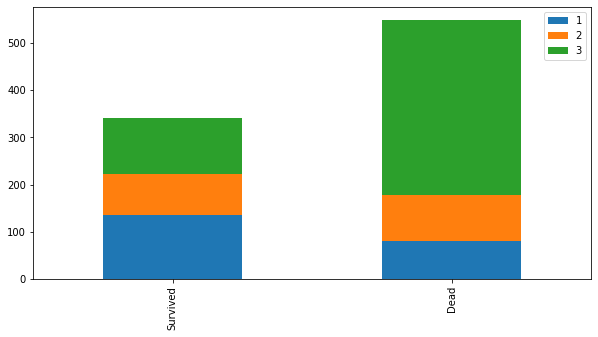

In [18]:
bar_charts('Pclass')

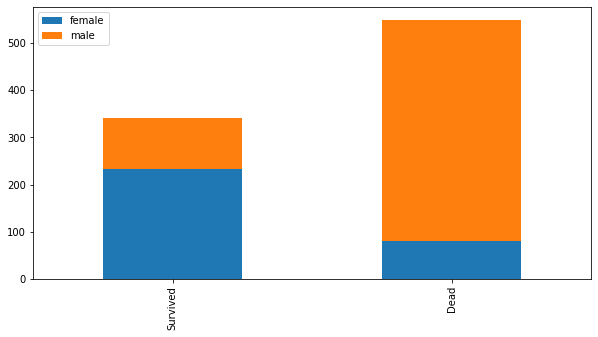

In [19]:
bar_charts('Sex')

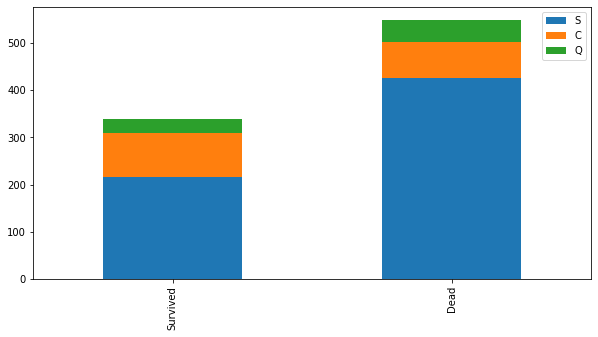

In [20]:
bar_charts('Embarked')

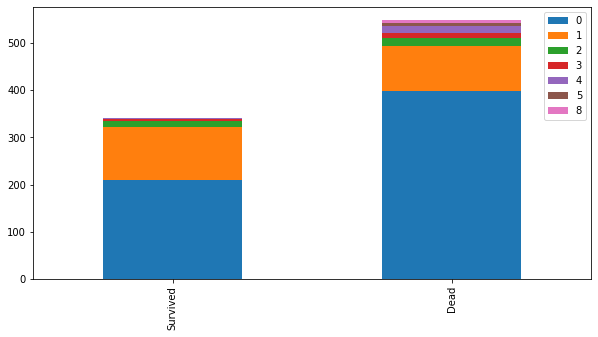

In [21]:
bar_charts('SibSp')

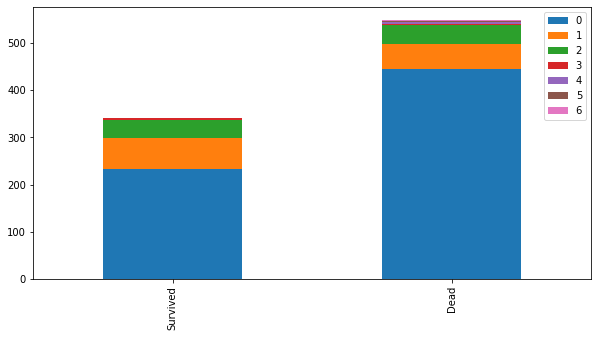

In [22]:
bar_charts('Parch')

# Feature Engineering

In [23]:
#Creating a new column 'title_name' from 'Name' features
df['name_title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['name_title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Jonkheer          1
Don               1
Mme               1
Lady              1
Capt              1
Sir               1
Dona              1
the Countess      1
Name: name_title, dtype: int64

In [24]:
most_frequent_titles = ['Mr', 'Miss', 'Mrs', 'Master']
df['name_title'] = df['name_title'].apply(lambda x: x if x in most_frequent_titles else 'others')

In [25]:
df['name_title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
others     34
Name: name_title, dtype: int64

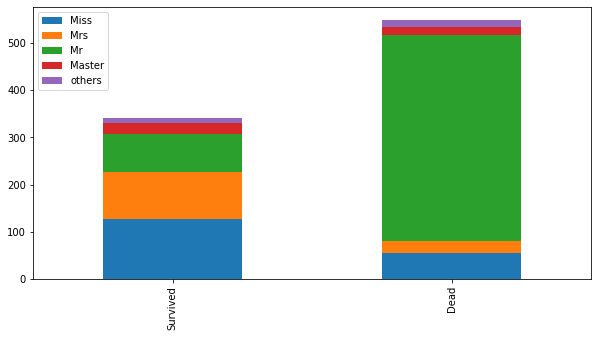

In [26]:
bar_charts('name_title')

In [27]:
#Creating new column of 'cabin_init' from 'Cabin' feature assuming same initials are clustered togeather
df['cabin_init'] = df['Cabin'].apply(lambda x: str(x)[0])
df['cabin_init'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_init, dtype: int64

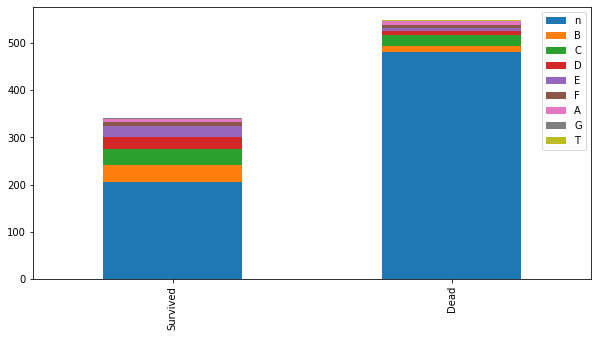

In [28]:
bar_charts("cabin_init")

In [29]:
#Creating a new column of 'ticket_numeric' from 'Ticket' feature
df['ticket_numeric'] = df['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_numeric'].value_counts()

1    957
0    352
Name: ticket_numeric, dtype: int64

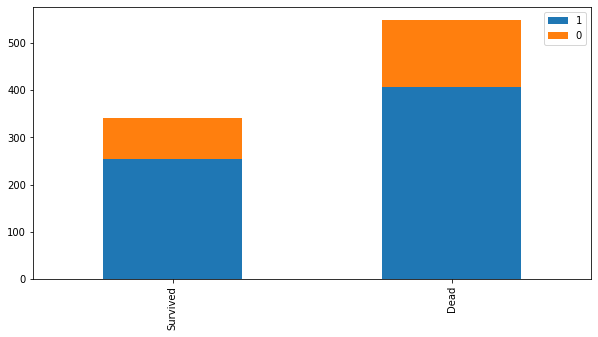

In [30]:
bar_charts("ticket_numeric")

Insight: Not much useful insight generated.

# Data Preprocessing

    Data Cleaning
    Handling categorical features
    Feature Selection
    Splitting the dataset into train set and validation set
    Feature Scaling

#Data Cleaning

    Removing unwanted features/columns
    Handling missing/NaN values

In [31]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'test_data',
       'name_title', 'cabin_init', 'ticket_numeric'],
      dtype='object')

In [32]:
#Removing columns dont provide any significant insight
print("Before Removing the Unwanted columns: {}".format(df.shape))
df.drop(labels=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
print("After Removing the Unwanted columns: {}".format(df.shape))

Before Removing the Unwanted columns: (1309, 16)
After Removing the Unwanted columns: (1309, 12)


In [33]:
df.isnull().sum()

Survived          418
Pclass              0
Sex                 0
Age               263
SibSp               0
Parch               0
Fare                1
Embarked            2
test_data           0
name_title          0
cabin_init          0
ticket_numeric      0
dtype: int64

Note: For 'Age' feature/column, we need to visualize it's distribution and find out if the outliers are present in the feature or not. If yes, then it is better to go with the median as it reduces the effect of outlier. If no, then mean can be considered.

Text(0.5, 1.0, 'Histogram of Age Feature')

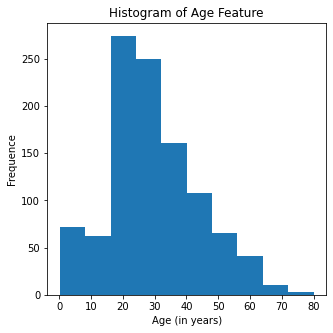

In [34]:
#Plotting Histogram from 'Age'
plt.figure(figsize=(5,5))
plt.hist(x=df['Age'],bins=10,histtype='bar',orientation='vertical')
plt.xlabel("Age (in years)")
plt.ylabel("Frequence")
plt.title("Histogram of Age Feature")

Text(0.5, 1.0, 'Boxplot of Age column')

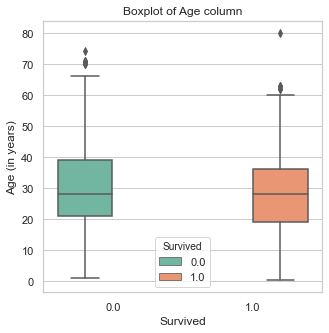

In [35]:
#Plotting Box plot for 'Age'
plt.figure(figsize=(5,5))
sns.set(style='whitegrid')
ax=sns.boxplot(x='Survived',y='Age',hue='Survived',data=df,palette='Set2')
plt.ylabel("Age (in years)")
plt.title("Boxplot of Age column")

In [36]:
#Replacing the NaN Values by median of the 'Age'
print("Number of NaN Values before: {}".format(df['Age'].isnull().sum()))
df['Age'].fillna(df['Age'].median(),inplace=True)
print("Number of NaN Values After: {}".format(df['Age'].isnull().sum()))

Number of NaN Values before: 263
Number of NaN Values After: 0


# Note: For 'Embarked' feature/column, since it is a categorical feature there are following techniques to fill NaN/missing values, and they are as follows:

    Deleting the NaN/missing rows
    Replace NaN with most frequent value
    Apply classifying algorithm for predicting the values
    Apply unsupervised machine learning algorithms like: K-Means, Hierarchical clustering

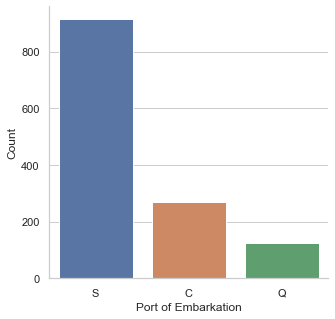

In [37]:
#Plotting Countplot for Embarked column
plt.figure(figsize=(5,5))
sns.countplot(x='Embarked',data=df)
#Removing the Unwanted Spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Headings
plt.xlabel("Port of Embarkation")
plt.ylabel('Count')
plt.show()

In [38]:
#Replacing NaN with frequent value
print("Number of NaN values before {}".format(df['Embarked'].isnull().sum()))
df['Embarked'].fillna('S',inplace=True)
print("Number of NaN values After: {}".format(df['Embarked'].isnull().sum()))

Number of NaN values before 2
Number of NaN values After: 0


Text(0.5, 1.0, 'Histogram for Fare Feature')

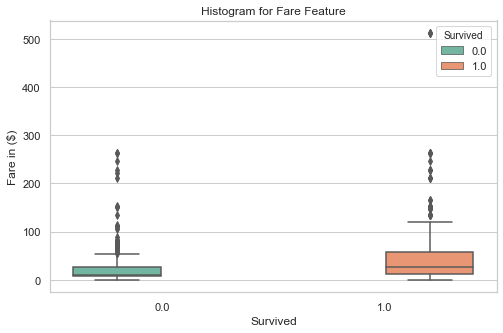

In [39]:
#Plotting Box Plot for 'Fare'
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived',y='Fare',hue='Survived',data=df,palette='Set2')
plt.ylabel('Fare in ($)')
plt.title("Histogram for Fare Feature")

In [40]:
#Using meadian to replace NaN Value in 'Fare' feature
print("Number of NaN Values Before: {}".format(df['Fare'].isnull().sum()))
df['Fare'].fillna(df['Fare'].median(),inplace=True)
print("Number of NaN Values Afetr: {}".format(df['Fare'].isnull().sum()))

Number of NaN Values Before: 1
Number of NaN Values Afetr: 0


In [41]:
df.isnull().sum()

Survived          418
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
test_data           0
name_title          0
cabin_init          0
ticket_numeric      0
dtype: int64

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,test_data,name_title,cabin_init,ticket_numeric
0,0.0,3,male,22.0,1,0,7.2500,S,0,Mr,n,0
1,1.0,1,female,38.0,1,0,71.2833,C,0,Mrs,C,0
2,1.0,3,female,26.0,0,0,7.9250,S,0,Miss,n,0
3,1.0,1,female,35.0,1,0,53.1000,S,0,Mrs,C,1
4,0.0,3,male,35.0,0,0,8.0500,S,0,Mr,n,1


In [43]:
#Converting 'Sex' Categorical column to binary feature
print("Datatype of Sex Feature Before {}: ".format(df['Sex'].dtype))
df['Sex'] = df['Sex'].apply(lambda x: 1 if (x=='male') else 0)
print("Data Type of Sex Feature after: {}".format(df['Sex'].dtype))
print('-----------------------------------------------------------')
print("Column Name Before{}: ".format(df.columns[2]))
df.rename(mapper={'Sex':'Sex_male'},axis=1,inplace=True)
print("Column Name After {}: ".format(df.columns[2]))

Datatype of Sex Feature Before object: 
Data Type of Sex Feature after: int64
-----------------------------------------------------------
Column Name BeforeSex: 
Column Name After Sex_male: 


In [44]:
#Converting Embarked Column using get_dummies()
print("Shape of df Before: {}".format(df.shape))
df = pd.get_dummies(data=df,columns=['Embarked','name_title','cabin_init'],drop_first=True)
print("Shape of df After: {}".format(df.shape))

Shape of df Before: (1309, 12)
Shape of df After: (1309, 23)


# Feature Selection

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
temp_X_train = df[df['test_data']==0].drop(['Survived'],axis=1)
temp_y_train = df[df['test_data']==0]['Survived']
etc = ExtraTreesClassifier()
etc.fit(temp_X_train,temp_y_train)

ExtraTreesClassifier()

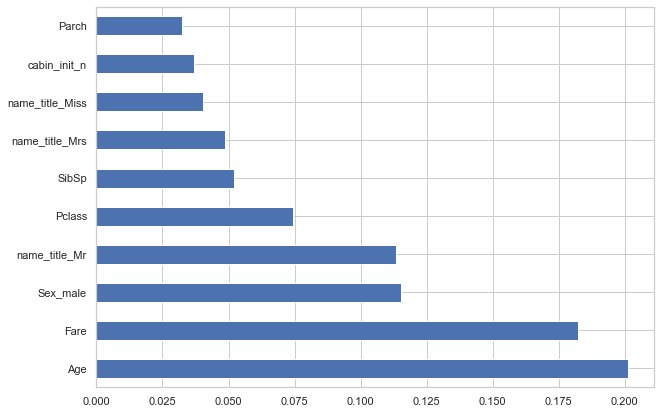

In [46]:
plt.figure(figsize=(10,7))
feature_score = pd.Series(etc.feature_importances_,index=temp_X_train.columns)
feature_score.nlargest(10).plot(kind='barh')
plt.show()

In [47]:
# Selecting top 10 features
df_important_features = df[['Age', 'Fare', 'Sex_male', 'name_title_Mr', 'Pclass', 'SibSp',
                            'cabin_init_n', 'Parch', 'name_title_Mrs', 'name_title_Miss', 'Survived', 'test_data']]

In [48]:
feature_score.nlargest(10).index

Index(['Age', 'Fare', 'Sex_male', 'name_title_Mr', 'Pclass', 'SibSp',
       'name_title_Mrs', 'name_title_Miss', 'cabin_init_n', 'Parch'],
      dtype='object')

# Spliting the data set

In [49]:
# Splitting the dataset into train set and test set
X_train = df_important_features[df_important_features['test_data']==0].drop(['Survived'], axis=1)
X_train.drop(['test_data'], axis=1, inplace=True)
y_train = df_important_features[df_important_features['test_data']==0]['Survived']
X_test = df_important_features[df_important_features['test_data']==1].drop(['Survived'], axis=1)
X_test.drop(['test_data'], axis=1, inplace=True)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (891, 10), X_test size: (418, 10)


# Feature Scalling

In [50]:
#Feature Scalling using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

# Model Buliding

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
#Fitting KNeighbors to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
cv = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
print("-----------Avrage Accuracy {}%".format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

-----------Avrage Accuracy 81.8202%
Scores for each cycle: [0.8        0.85393258 0.75280899 0.79775281 0.83146067 0.82022472
 0.83146067 0.79775281 0.85393258 0.84269663]


In [53]:
#Fitting DecisionTreeClassifier to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X_train_scaled, y_train, cv=10, scoring='accuracy')
print("-------Average Accuracy: {}%".format(round(cv.mean()*100,4)))
print("Score for each Cycle: {}".format(cv))

-------Average Accuracy: 79.6891%
Score for each Cycle: [0.76666667 0.78651685 0.6741573  0.76404494 0.85393258 0.85393258
 0.80898876 0.79775281 0.84269663 0.82022472]


In [54]:
#Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cv = cross_val_score(lr, X_train_scaled, y_train, cv=10, scoring='accuracy')
print("------------Average Accuracy: {}%".format(round(cv.mean()*100,4)))
print("Score for each cycle: {}".format(cv))

------------Average Accuracy: 81.8165%
Score for each cycle: [0.83333333 0.82022472 0.75280899 0.85393258 0.82022472 0.76404494
 0.84269663 0.82022472 0.83146067 0.84269663]


In [55]:
#Fitting the BernoulliNB to the Training set
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
cv = cross_val_score(bnb,X_train_scaled,y_train,cv=10,scoring='accuracy')
print("-------Average Accuracy: {}%".format(round(cv.mean()*100,4)))
print("Score of each cycle: {}".format(cv))

-------Average Accuracy: 79.1273%
Score of each cycle: [0.76666667 0.80898876 0.76404494 0.84269663 0.80898876 0.78651685
 0.79775281 0.76404494 0.79775281 0.7752809 ]


In [56]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rfc, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 81.7166% ---
Scores for each cycle: [0.72222222 0.84269663 0.71910112 0.85393258 0.84269663 0.87640449
 0.79775281 0.78651685 0.87640449 0.85393258]


In [57]:
#Fitting AdaBoost Classifier to the Training set
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
cv = cross_val_score(ada,X_train_scaled,y_train,cv=10,scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 81.372% ---
Scores for each cycle: [0.78888889 0.79775281 0.7752809  0.84269663 0.82022472 0.74157303
 0.85393258 0.85393258 0.84269663 0.82022472]


In [58]:
#Fitting the Xgboost Classifier to the Training set
from xgboost import XGBClassifier
xgb = XGBClassifier()
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=10,scoring='accuracy')
print("-------Average Accuracy: {}%".format(cv.mean()*100,4))
print("Score for each cycle: {}".format(cv))

-------Average Accuracy: 83.05617977528088%
Score for each cycle: [0.8        0.80898876 0.76404494 0.85393258 0.88764045 0.82022472
 0.84269663 0.83146067 0.86516854 0.83146067]


In [59]:
# Fitting VotingClassifier to the Training set
from sklearn.ensemble import VotingClassifier
vt = VotingClassifier(estimators = [('knn',knn), ('dt',dt), ('lr',lr), ('bnb',bnb),('rfc',rfc),('ada',ada),('xgb',xgb)], voting = 'soft') 
cv = cross_val_score(vt, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 83.2821% ---
Scores for each cycle: [0.78888889 0.85393258 0.75280899 0.85393258 0.86516854 0.82022472
 0.83146067 0.82022472 0.88764045 0.85393258]


# Submission

In [60]:
# VotingClassifier
vt = VotingClassifier(estimators = [('knn',knn), ('dt',dt), ('lr',lr), ('bnb',bnb),('rfc',rfc),('ada',ada),('xgb',xgb)], voting = 'soft') 
vt.fit(X_train_scaled, y_train)

prediction = vt.predict(X_test_scaled)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction.astype(int)
    })

submission.to_csv('vt_submission.csv', index=False)